# The Poisson Distribution
The poisson distribution has a special relation to the binomial distribution. The theoretical underpinnings are as follows. Imagine that we take a time period and break it into subintervals that are so small that at most one successful event could occur. We can then imagine that for any of these subintervals, a binomial distribution could apply where there is some probability of the event occuring p, a probability q=1-p that the event does not occur, and a probability of 0 that more then one event occurs. We assume that as we cut time into smaller and smaller intervals, the chance of a success should go down. If we take the limit of the binomial distribution as n goes to infinity (more and more subintervals that are progressively smaller), the result is the poisson distribution.

Binomial Probability Distribution:  
$p(y) = \binom{n}{y}p^y(1-p)^{n-y}$
  
$\lambda = n*p$  
  
Poisson Probability Distribution:
$p(y) = \frac{\lambda^y}{y!}e^{-y}$
  
  
Also note that labmda is the now the average number of successes that we anticipate in a given interval. (The probability p of success, times n the number of intervals.) This is then exactly how the poisson is used in practice, if I know the average number of occurences in a given interval, what is the probability that the actual number of occurences is slightly more, slightly less, far more or far less?

# Poisson Function
Write a function to calculate the probability that y events occur in a given interval given the average number of occurrences expected.

In [2]:
import numpy as np
import math

In [25]:
def poisson(y, mu):
    """mu (lambda above) is the average number of events in the given time interval.
    You are calculating the probability that y events occur."""
    #Your code here
    term1 = (mu**y)/(math.factorial(y))
    term2 = np.e**(-mu)
    prob = term1 * term2
    return prob

# Reinventing the Wheel
Check that your poisson function above works by checking its output for 1000 examples against scipys built in function:  
scipy.stats.distributions.poisson.pmf

In [20]:
from scipy.stats.distributions import poisson as poisson2

In [43]:
#generate test cases, y slightly off (but always greater then zero)
mus = [np.random.uniform(low=0.5,high=7) for i in range(1000)]
test_cases = [(int(mu+np.random.uniform(low=-0.4, high=3)), mu) for mu in mus]

custom = [poisson(test_case[0], test_case[1]) for test_case in test_cases]
pre_built = [poisson2.pmf(test_case[0], test_case[1]) for test_case in test_cases]

def equals(a,b, precision=10**-5):
    if np.abs(a-b)<=precision:
        return True
    else:
        return False

print('All values roughly equal:', all([equals(a, b) for a,b in list(zip(custom,pre_built))]))

All values roughly equal: True


# Mail
Let's say on average, you receive 4 pieces of mail per day. Draw a graph with the x-axis pieces of mail (0-20) and the y-axis the probabilitiy that you receive that many pieces of mail on a given day.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x10bb36e10>,
 <a list of 21 Text xticklabel objects>)

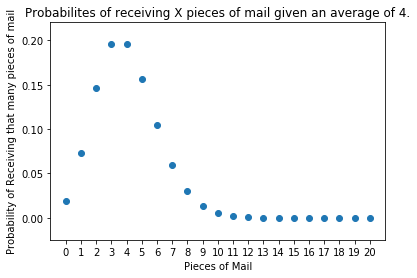

In [47]:
#Your code here
probs = [poisson(i, 4) for i in range(21)]
plt.scatter(range(21), probs)
plt.title('Probabilites of receiving X pieces of mail given an average of 4.')
plt.xlabel('Pieces of Mail')
plt.ylabel('Probability of Receiving that many pieces of mail')
plt.xticks(range(21))

# Home Runs
https://www.teamrankings.com/mlb/stat/home-runs-per-game  
  
On average, the Yankees hit 1.47 home runs per game in 2017. What was the probability that they hit 2 home runs in a game? 3?

In [48]:
#Your code/answer here
print(poisson(2, 1.47))
print(poisson(3, 1.47))

0.24842299046999577
0.12172726533029794


# Home Runs 2
In the same year, the Red Sox only had 1.04 home runs per game in 2017. What was the probability that they hit 2 home runs in a game? 3?

In [49]:
#Your code/answer here
print(poisson(2, 1.04))
print(poisson(3, 1.04))

0.19114829200330832
0.06626474122781356


# Product Failures
Airplane tires need replacement after about 1500 flights. Let's assume that on an average day, an airline has to replace 2.34 tires per day. If you want to have a 95% confidence that you'll have enough tires for needed repairs, how many should be on stock? (We want to have enough, but storing tires is also expensive!)

In [50]:
#Your code/answer here
cum_sum = 0
tires_needed = 0
while cum_sum < .95:
    prob = poisson(tires_needed, 2.34) #chance_of_this_many_tires_needed
    cum_sum += prob
    print('Chance of {} tires being replaced: {}. Cumulative probability: {}'. format(tires_needed, prob, cum_sum))
    tires_needed +=1
print('With {} tires, you have a {} chance of being covered.'.format(tires_needed-1, cum_sum))

Chance of 0 tires being replaced: 0.09632763823049305. Cumulative probability: 0.09632763823049305
Chance of 1 tires being replaced: 0.22540667345935372. Cumulative probability: 0.3217343116898468
Chance of 2 tires being replaced: 0.2637258079474438. Cumulative probability: 0.5854601196372906
Chance of 3 tires being replaced: 0.20570613019900616. Cumulative probability: 0.7911662498362968
Chance of 4 tires being replaced: 0.1203380861664186. Cumulative probability: 0.9115043360027154
Chance of 5 tires being replaced: 0.056318224325883896. Cumulative probability: 0.9678225603285993
With 5 tires, you have a 0.9678225603285993 chance of being covered.


# Product Failures 2
How many tires do you need on stock to have a 99% confidence that you'll have enough in stock? 99.9% confidence?

In [52]:
#Your code/answer here
#Your code/answer here
cum_sum = 0
tires_needed = 0
while cum_sum < .99:
    prob = poisson(tires_needed, 2.34) #chance_of_this_many_tires_needed
    cum_sum += prob
    print('Chance of {} tires being replaced: {}. Cumulative probability: {}'. format(tires_needed, prob, cum_sum))
    tires_needed +=1
print('With {} tires, you have a {} chance of being covered.'.format(tires_needed-1, cum_sum))

print('\n\n')

#Your code/answer here
cum_sum = 0
tires_needed = 0
while cum_sum < .999:
    prob = poisson(tires_needed, 2.34) #chance_of_this_many_tires_needed
    cum_sum += prob
    print('Chance of {} tires being replaced: {}. Cumulative probability: {}'. format(tires_needed, prob, cum_sum))
    tires_needed +=1
print('With {} tires, you have a {} chance of being covered.'.format(tires_needed-1, cum_sum))

Chance of 0 tires being replaced: 0.09632763823049305. Cumulative probability: 0.09632763823049305
Chance of 1 tires being replaced: 0.22540667345935372. Cumulative probability: 0.3217343116898468
Chance of 2 tires being replaced: 0.2637258079474438. Cumulative probability: 0.5854601196372906
Chance of 3 tires being replaced: 0.20570613019900616. Cumulative probability: 0.7911662498362968
Chance of 4 tires being replaced: 0.1203380861664186. Cumulative probability: 0.9115043360027154
Chance of 5 tires being replaced: 0.056318224325883896. Cumulative probability: 0.9678225603285993
Chance of 6 tires being replaced: 0.021964107487094722. Cumulative probability: 0.989786667815694
Chance of 7 tires being replaced: 0.007342287359971665. Cumulative probability: 0.9971289551756657
With 7 tires, you have a 0.9971289551756657 chance of being covered.



Chance of 0 tires being replaced: 0.09632763823049305. Cumulative probability: 0.09632763823049305
Chance of 1 tires being replaced: 0.22540667